<a href="https://colab.research.google.com/github/AC8151/COG_INTERNSHIP_GN22CDBDS001/blob/main/Time%20Series%20Analysis_Identify_data_challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true

--2022-03-30 04:57:39--  https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/a-forty-two/diamler_17_jan/raw/main/Sample-Superstore.xls [following]
--2022-03-30 04:57:40--  https://github.com/a-forty-two/diamler_17_jan/raw/main/Sample-Superstore.xls
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a-forty-two/diamler_17_jan/main/Sample-Superstore.xls [following]
--2022-03-30 04:57:40--  https://raw.githubusercontent.com/a-forty-two/diamler_17_jan/main/Sample-Superstore.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199

In [2]:
!cp Sample-Superstore.xls?raw=true superstore.xls

In [3]:
!ls

 sample_data			    'Sample-Superstore.xls?raw=true.2'
'Sample-Superstore.xls?raw=true'     superstore.xls
'Sample-Superstore.xls?raw=true.1'


In [4]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel('superstore.xls')
pd.set_option('display.max_rows', 500)

In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
data.info()
# 9994  total
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
# unique values exist per column! (CARDINALITY)
for name in data.columns:
  print(name , end=" ")
  print(data[name].value_counts())
# too bulky to analyze, we just need to know per column 
# a COUNT of unique values!

Row ID 2049    1
8865    1
6806    1
4759    1
8857    1
       ..
5432    1
7481    1
1338    1
3387    1
2047    1
Name: Row ID, Length: 9994, dtype: int64
Order ID CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
CA-2016-105732    10
                  ..
CA-2017-147564     1
CA-2014-134677     1
CA-2017-100433     1
CA-2016-168830     1
CA-2015-163104     1
Name: Order ID, Length: 5009, dtype: int64
Order Date 2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-02    34
2017-12-01    34
              ..
2016-02-25     1
2014-01-15     1
2014-09-24     1
2017-07-12     1
2015-12-09     1
Name: Order Date, Length: 1237, dtype: int64
Ship Date 2015-12-16    35
2017-09-26    34
2017-11-21    32
2017-12-06    32
2017-09-06    30
              ..
2014-12-24     1
2017-04-06     1
2016-08-07     1
2016-08-25     1
2017-07-22     1
Name: Ship Date, Length: 1334, dtype: int64
Ship Mode Standard Class    5968
Second Class      1945
First Class       1

In [10]:
# CARDINALITY
for name in data.columns:
  print(name , end=" ")
  # Aggregate to view smaller but more readable data!
  print(data[name].value_counts().count())

Row ID 9994
Order ID 5009
Order Date 1237
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1850
Sales 6144
Quantity 14
Discount 12
Profit 7545


In [11]:
# C1  10 20 5 6 6 99 42-> 7 (6)
# c2.  2. 5 2 5 1 5  5 -> 7 ( 3 )


In [12]:
# DISCRETE-> 1,2,3,4 -> only 2
# Continuous-> all the number between 1 and 4-> infinite

In [13]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [14]:
data['Order Date']
# multiple date entries in the record!

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [15]:
data['Order Date'].min(), data['Order Date'].max()
# OBSERVATION-> Jan1,2 of 2014 is missing!
# 31st dec of 2017-> missing NOT null!

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [16]:
df = data.groupby('Order Date')
df['Order Date'].value_counts().count()
# ONLY 1237 entries for all the days of 2014 to 2017!

1237

In [17]:
# 4 years X 365.25 days = 1461 (expected)
# reality-> 1237 entries!
# Missing values= 1461 - 1237 = 224

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [54]:
year_df=data[['Order Date', 'Sales']].copy()
year_df.set_index('Order Date', inplace=True)
year_df.head()

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2016-06-12,14.6200
2015-10-11,957.5775
2015-10-11,22.3680


In [55]:
year_df = year_df.resample('1D').sum().interpolate()
year_df

,Sales
Order Date,
2014-01-03,16.4480
2014-01-04,288.0600
2014-01-05,19.5360
2014-01-06,4407.1000
2014-01-07,87.1580
...,...
2017-12-26,814.5940
2017-12-27,177.6360
2017-12-28,1657.3508


Text(0, 0.5, 'Sales')

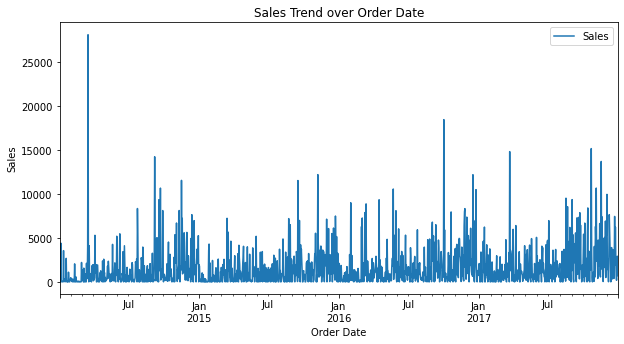

In [62]:
year_df.plot(figsize=(10,5), title='Sales Trend over Order Date')
plt.xlabel('Order Date')
plt.ylabel('Sales')

OBSERVATION: Sales has a dip in 2015, then steadily increases over 2016-17